In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("C:\\Users\\saivi\\Downloads\\Titanic-Dataset.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
# summary statistics 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


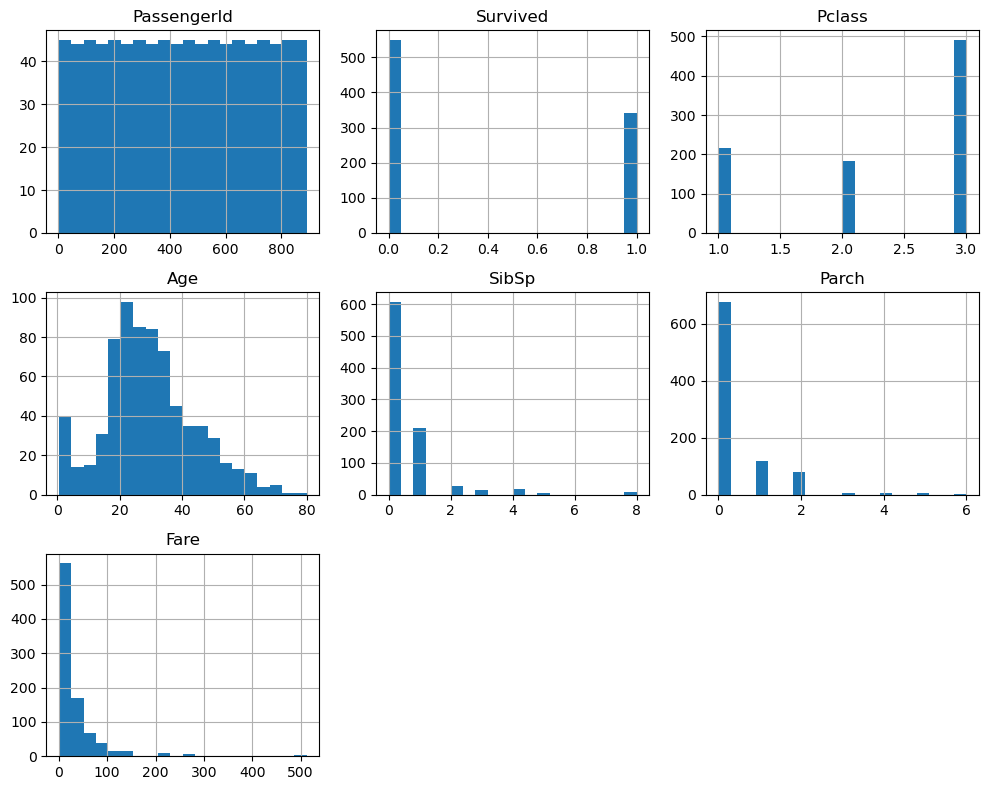

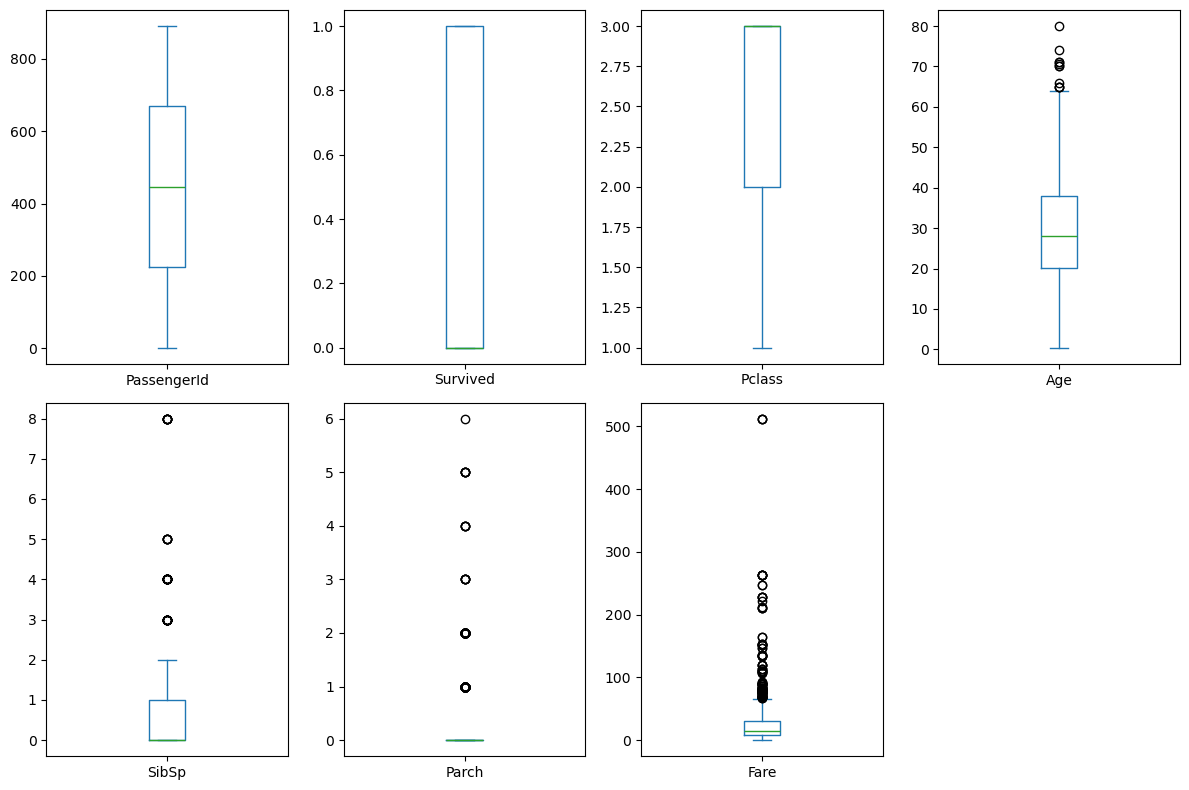

In [34]:
# Create histograms for numeric features
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Create boxplots for numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

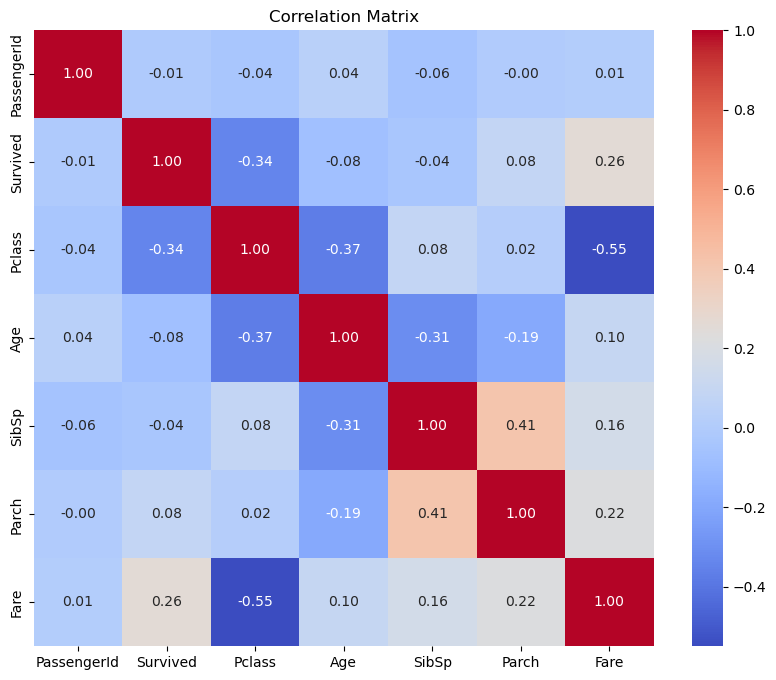

In [35]:
# Correlation matrix
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


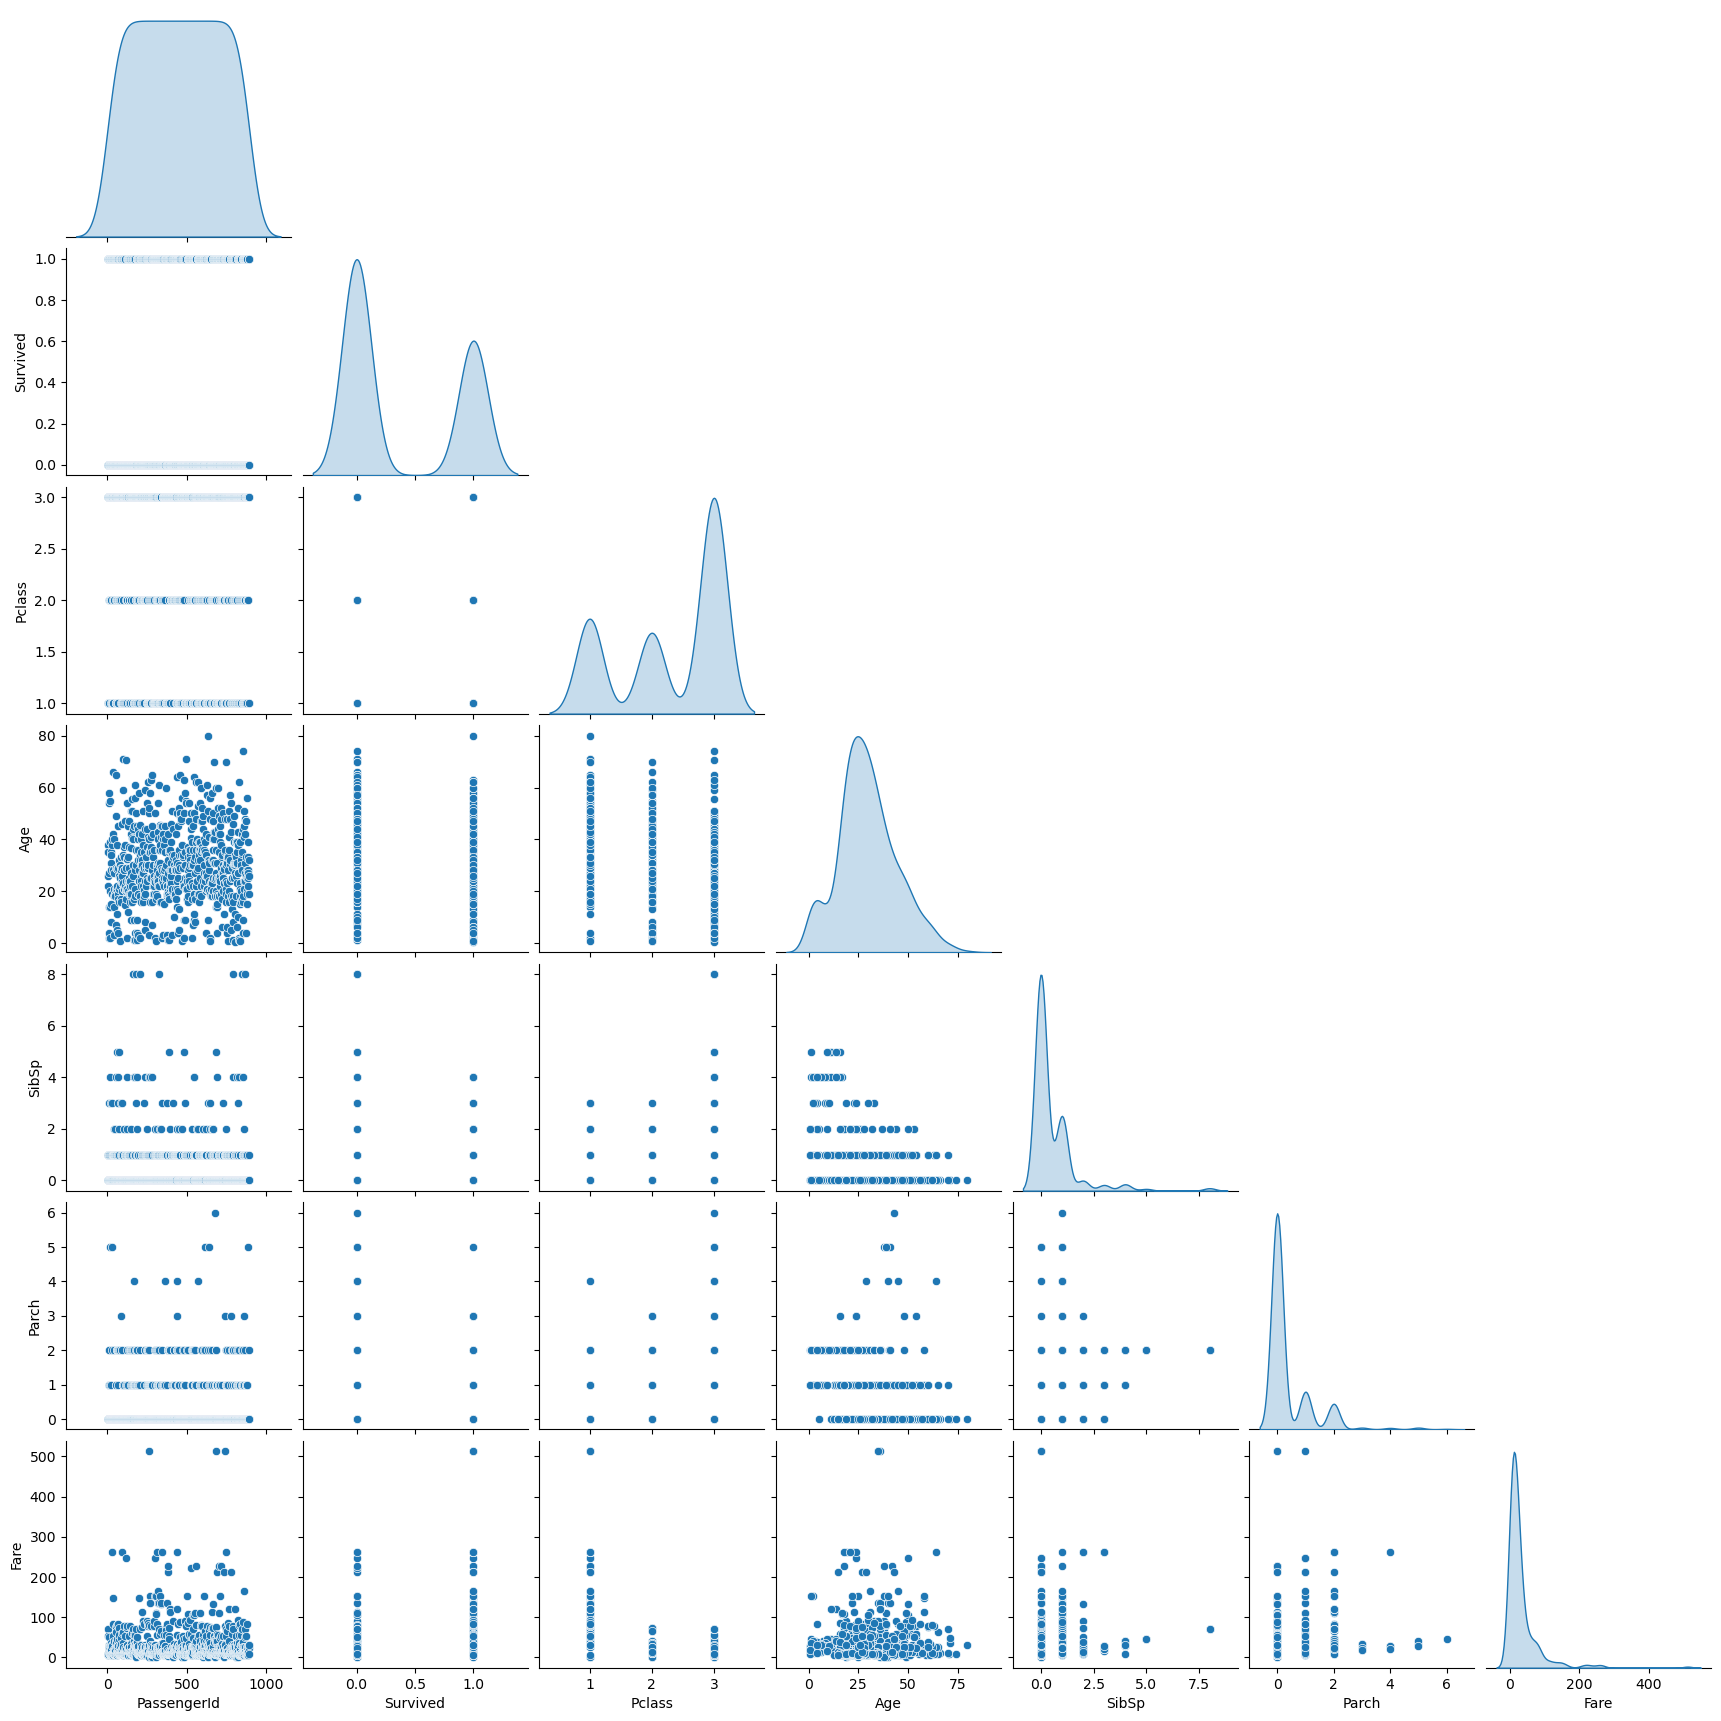

In [36]:
# Pairplot
sns.pairplot(df[numeric_features], diag_kind='kde', corner=True)
plt.show()

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


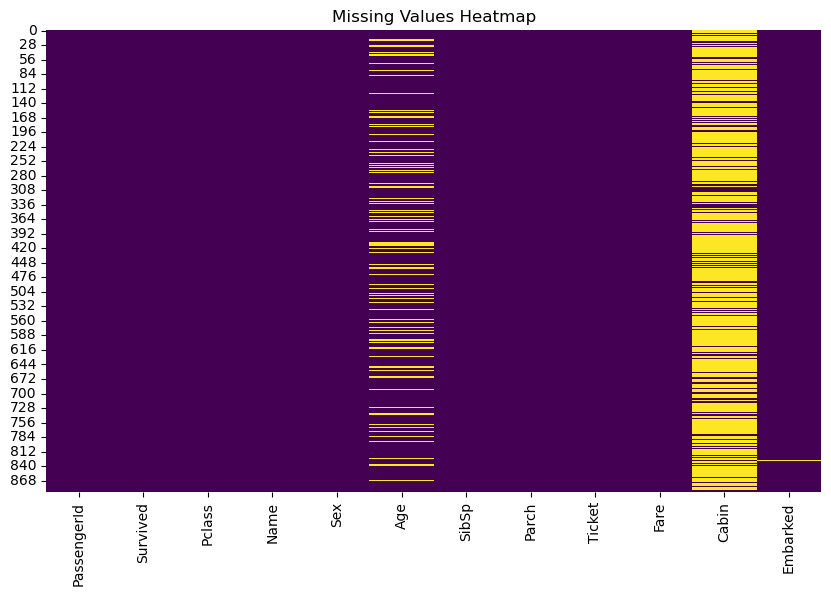

In [37]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [38]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [39]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\saivi\AppData\Local\Temp\ipykernel_30184\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [40]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [41]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [42]:
df['Embarked'].value_counts()
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].value_counts()

C:\Users\saivi\AppData\Local\Temp\ipykernel_30184\1721489075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

C:\Users\saivi\AppData\Local\Temp\ipykernel_30184\756355008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


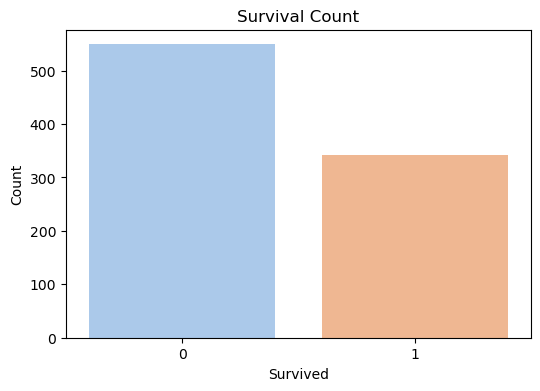

In [43]:
# Analyze the distribution of the 'Survived' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

C:\Users\saivi\AppData\Local\Temp\ipykernel_30184\770505762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')


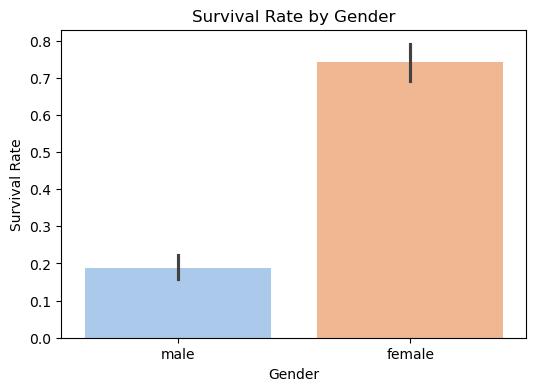

In [44]:
# Analyze survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\saivi\AppData\Local\Temp\ipykernel_30184\1811481265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette='pastel')


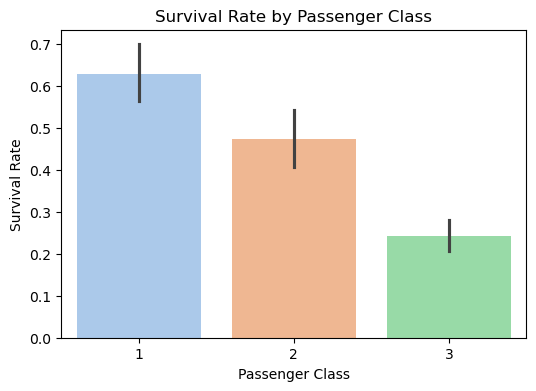

In [45]:
# Analyze survival rate by passenger class
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pclass', y='Survived', palette='pastel')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

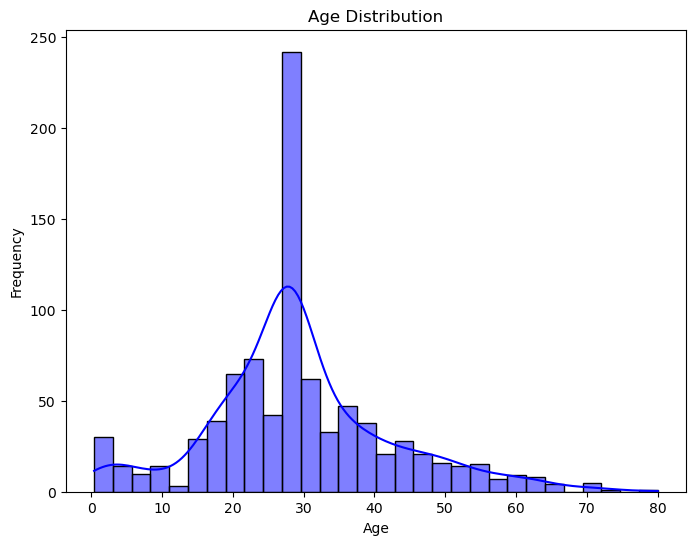

In [46]:
# Analyze age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


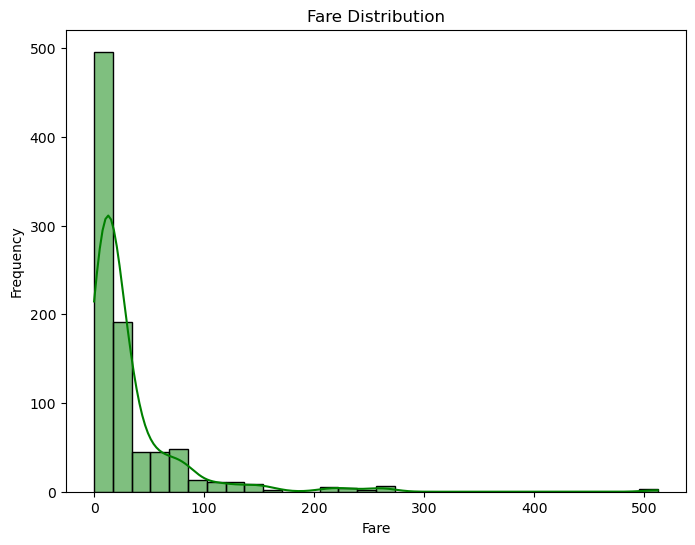

In [48]:
# Analyze fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# So these are the Basic feature-level inferences

# 1. Missing Values:
print("Age and Cabin have significant missing values,Age is filled with medium imputation technique and Embarked has a few missing values and is filled with 'S'.")
print("PassengerId, Name, Ticket, and Cabin are dropped as they are not useful for analysis.")

# 2. Correlation Matrix:
print("\nFare and Pclass are negatively correlated (-0.55). Age and Pclass are also negatively correlated (-0.37).")
print("SibSp and Parch are positively correlated (0.41).")

# 3. Survival Analysis:
print("\nSurvival rate is higher for females compared to males.")
print("Survival rate is higher for passengers in first class compared to other classes.")

# 4. Age \nDistribution:
print("\nThe age distribution is roughly normal, with a peak around 20-30 years.")

# 5. Fare Distribution:
print("\nFare Distribution Inference:"
print("Fare distribution is right-skewed, with most passengers paying lower fares.")

# 6. Numeric Features:
print("\nBoxplots show outliers in Fare and Age. SibSp and Parch have many zero values.")

Missing Values Inference:
Age and Cabin have significant missing values. Embarked has a few missing values.

Correlation Matrix Inference:
Fare and Pclass are negatively correlated (-0.55). Age and Pclass are also negatively correlated (-0.37).
SibSp and Parch are positively correlated (0.41).

Survival Analysis Inference:
Survival rate is higher for females compared to males.
Survival rate is higher for passengers in first class compared to other classes.

Age Distribution Inference:
The age distribution is roughly normal, with a peak around 20-30 years.

Fare Distribution Inference:
Fare distribution is right-skewed, with most passengers paying lower fares.

Numeric Features Inference:
Boxplots show outliers in Fare and Age. SibSp and Parch have many zero values.
